# Generalization study

In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import logging

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

from analysis import load_configs, load_experimental_results, get_stats
from factorization.config import IMAGE_DIR, USETEX
from factorization.models.mlp import Model

logging.basicConfig(level=logging.INFO)


rc("font", family="serif", size=8)
rc("text", usetex=USETEX)
if USETEX:
    rc("text.latex", preamble=r"\usepackage{times}")


def get_names(name):
    match name:
        case "filtration":
            return "filtration", ["beta"]
        case "generalization":
            return "generalization", ["statistical_complexity"]
        case "split":
            return "split", ["data_split"]

In [3]:
save_fig = False

## Filtration

In [4]:
name = "filtration"
xaxis = "epoch"

kwargs = {
    "input_factors": [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
    # "input_factors": [8, 8, 8, 8],
    "output_factors": [8, 8, 8, 8],
    # "output_factors": [4096],
    "alphas": 1e-1,
}

file_path, study_factors = get_names(name)

In [5]:
all_configs = load_configs(file_path)
res = load_experimental_results(all_configs, **kwargs)

In [6]:
all_mean, all_std, keys = get_stats(res, study_factors, xaxis=xaxis, **kwargs)

INFO:matplotlib.mathtext:Substituting symbol L from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol L from STIXNonUnicode


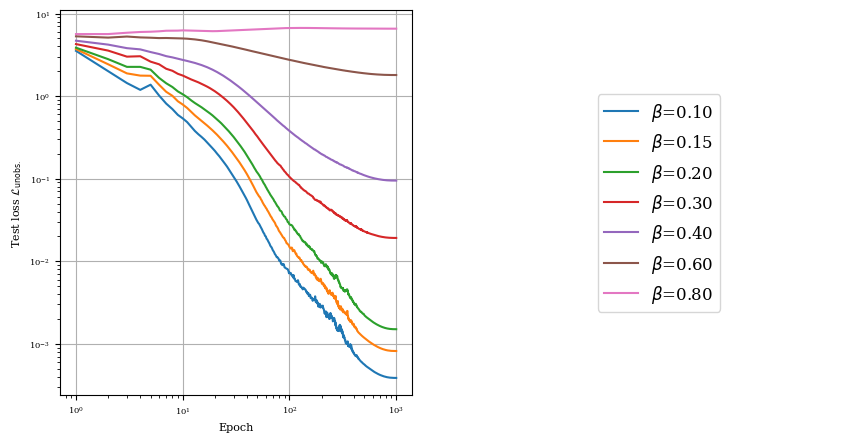

In [7]:
if save_fig:
    fig, ax = plt.subplots(1, 1, figsize=(1.75, 1.5))
else:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    ax = axes[0]

y_name = "test_loss"
legend = []
all_plots = []
ind = 0
for val, val_std in zip(all_mean, all_std):
    ind += 1
    # if ind % 2 == 0:
        # continue
    a, = ax.plot(val[y_name], linewidth=1.5)
    all_plots.append(a)
    # leg = ' '.join([rf'{key}={val[key].values[0]}' for key in keys])
    leg = rf'$\beta$={val[keys[0]].values[0]:.2f}'
    legend.append(leg)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Epoch", fontsize=8)
ax.set_ylabel(r"Test loss ${\cal L}_{\text{unobs.}}$", fontsize=8)
ax.tick_params(axis='both', labelsize=6)
ax.grid()
if save_fig:
    fig.savefig(IMAGE_DIR / f'{name}.pdf', bbox_inches='tight')

if save_fig:
    fig, ax = plt.subplots(1, 1, figsize=(.25, 1.5))
    leg = ax.legend(all_plots, legend, loc='center', ncol=1, fontsize=6)
    ax.axis('off')
    fig.savefig(IMAGE_DIR / f'{name}_leg.pdf', bbox_inches='tight')
else:
    ax = axes[1]
    leg = ax.legend(all_plots, legend, loc='center', ncol=1, fontsize=12)
    ax.axis('off')

## Statistical Complexity

In [19]:
name = "generalization"
xaxis = "epoch"

kwargs = {
    "input_factors": [8, 8, 8, 8],
    # "output_factors": [8, 8, 8, 8],
    # "output_factors": [4096],
    "alphas": 1e-1,
}

file_path, study_factors = get_names(name)

In [20]:
all_configs = load_configs(file_path)
res = load_experimental_results(all_configs, **kwargs)

In [21]:
all_mean, all_std, keys = get_stats(res, study_factors, xaxis=xaxis, **kwargs)

INFO:matplotlib.mathtext:Substituting symbol L from STIXNonUnicode


INFO:matplotlib.mathtext:Substituting symbol L from STIXNonUnicode


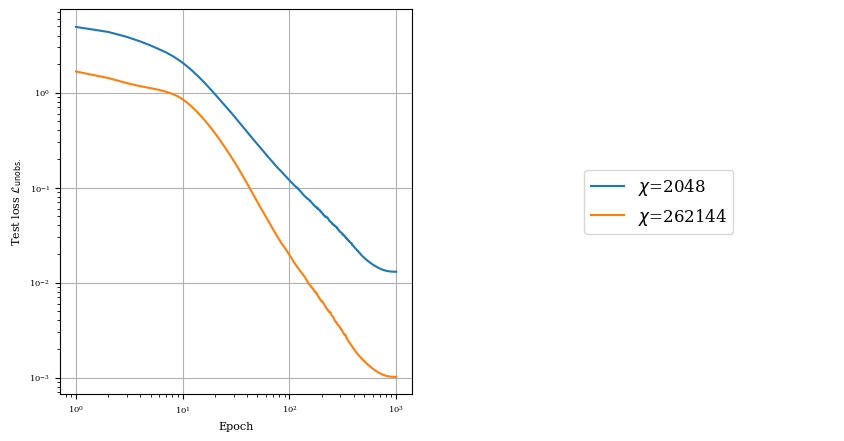

In [22]:
if save_fig:
    fig, ax = plt.subplots(1, 1, figsize=(1.75, 1.5))
else:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    ax = axes[0]

y_name = "test_loss"
legend = []
all_plots = []
ind = 0
for val, val_std in zip(all_mean, all_std):
    ind += 1
    # if ind % 2 == 0:
        # continue
    a, = ax.plot(val[y_name], linewidth=1.5)
    all_plots.append(a)
    # leg = ' '.join([rf'{key}={val[key].values[0]}' for key in keys])
    leg = rf'$\chi$={val[keys[0]].values[0]}'
    legend.append(leg)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Epoch", fontsize=8)
ax.set_ylabel(r"Test loss ${\cal L}_{\text{unobs.}}$", fontsize=8)
ax.tick_params(axis='both', labelsize=6)
ax.grid()
if save_fig:
    fig.savefig(IMAGE_DIR / f'{name}.pdf', bbox_inches='tight')

if save_fig:
    fig, ax = plt.subplots(1, 1, figsize=(.25, 1.5))
    leg = ax.legend(all_plots, legend, loc='center', ncol=1, fontsize=6)
    ax.axis('off')
    fig.savefig(IMAGE_DIR / f'{name}_leg.pdf', bbox_inches='tight')
else:
    ax = axes[1]
    leg = ax.legend(all_plots, legend, loc='center', ncol=1, fontsize=12)
    ax.axis('off')

## Data split

In [ ]:
name = "split"
xaxis = "flops"

kwargs = {
}

file_path, study_factors = get_names(name)

In [ ]:
all_configs = load_configs(file_path)
res = load_experimental_results(all_configs, **kwargs)

In [ ]:
res['flops'] = res['epoch'] * res['data_split']

In [ ]:
all_mean, all_std, keys = get_stats(res, study_factors, xaxis=xaxis, **kwargs)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(1.75, 1.5))

y_name = "test_loss"
color = 'C0'
legend = []
all_plots = []
ind = 0
for val, val_std in zip(all_mean, all_std):
    ind += 1
    if ind % 2 == 0:
        continue
    a, = ax.plot(val[y_name], linewidth=1.5)
    all_plots.append(a)
    leg = ' '.join([rf'{key}={val[key].values[0]}' for key in keys])
    leg = rf'{100 * val[keys[0]].values[0]:.0f} %'
    legend.append(leg)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Flop", fontsize=8)
ax.set_ylabel(r"Test loss ${\cal L}_{\text{unobs.}}$", fontsize=8)
ax.tick_params(axis='both', labelsize=6)
ax.grid()
fig.savefig(IMAGE_DIR / f'{name}.pdf', bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=(.25, 1.5))
ax.axis('off')
leg = ax.legend(all_plots, legend, loc='center', ncol=1, fontsize=6)
fig.savefig(IMAGE_DIR / f'{name}_leg.pdf', bbox_inches='tight')